# Dimensionality Reduction Tutorial

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/sensein/senselab/blob/main/tutorials/utils/dimensionality_reduction.ipynb)


In this tutorial, we'll explore how to use senselab to employ dimensionality reduction techniques to visualize high-dimensional data. We'll use the scikit-learn digits dataset as our example, but this can be extended to any high-dimensionality dataset, such as a set of speaker embeddings.

Senselab supports 3 dimensionality reduction techniques, and we will cover all of them in this tutorial:

- Principal Component Analysis (PCA)
- t-Distributed Stochastic Neighbor Embedding (t-SNE)
- Uniform Manifold Approximation and Projection (UMAP)

Let's start by installing the package:

In [1]:
%pip install senselab

Note: you may need to restart the kernel to use updated packages.


First, let's import the necessary libraries:

In [2]:
import matplotlib.pyplot as plt
import torch
from sklearn.datasets import load_digits

from senselab.utils.tasks.dimensionality_reduction import compute_dimensionality_reduction
%matplotlib inline

## Load the scikit-learn digits dataset
We'll use the digits dataset from scikit-learn for our high-dimensionality dataset. Each sample is an 8x8 image of a hand-written digit, and has a dimensionality of 64.

Senselab expects the data to be in a pytorch tensor, so we make sure to convert the data into a tensor before processing it.

See here for more information on the dataset: [https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html)

In [3]:
# Load the digits dataset
digits = load_digits()
digits_data = digits.data
digits_target = digits.target

# Convert to PyTorch tensor
digits_data = torch.tensor(digits_data, dtype=torch.float32)

# Look at the shape of the data. There are 1797 samples and each sample has 64 features
digits_data.shape

torch.Size([1797, 64])

## Using and visualizing PCA
Principal Component Analysis (PCA) is a linear dimensionality reduction technique that identifies the directions (principal components) along which the data varies the most. Senselab makes it easy to use PCA to analyze any dataset with a single command. Note that after running PCA, the dimensionality of the data reduces from 64 into 2 PCA components, making it easy to plot or analyze further.

Reduced data shape: torch.Size([1797, 2])


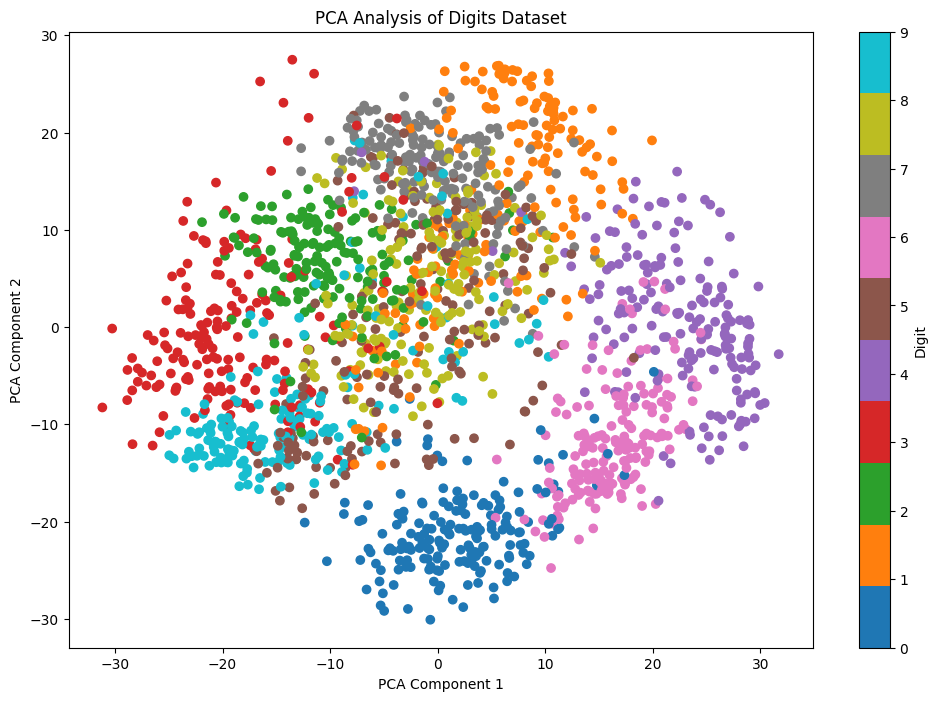

In [4]:
# Perform PCA analysis on the digits dataset
reduced_data_pca = compute_dimensionality_reduction(digits_data, model="pca", n_components=2)

print("Reduced data shape:", reduced_data_pca.shape)

# Plot the reduced data
plt.figure(figsize=(12, 8))
scatter = plt.scatter(reduced_data_pca[:, 0], 
                      reduced_data_pca[:, 1], 
                      c=digits_target, 
                      cmap='tab10')
plt.title("PCA Analysis of Digits Dataset")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(scatter, label="Digit")
plt.show()

## Using and visualizing t-SNE
t-SNE is a non-linear technique that's particularly good at preserving local structures in the data, making it useful for visualization. Using the same senselab function as in PCA, change `model="pca"` into `model="tsne"` to use t-SNE to reduce the data.

Reduced data shape: torch.Size([1797, 2])


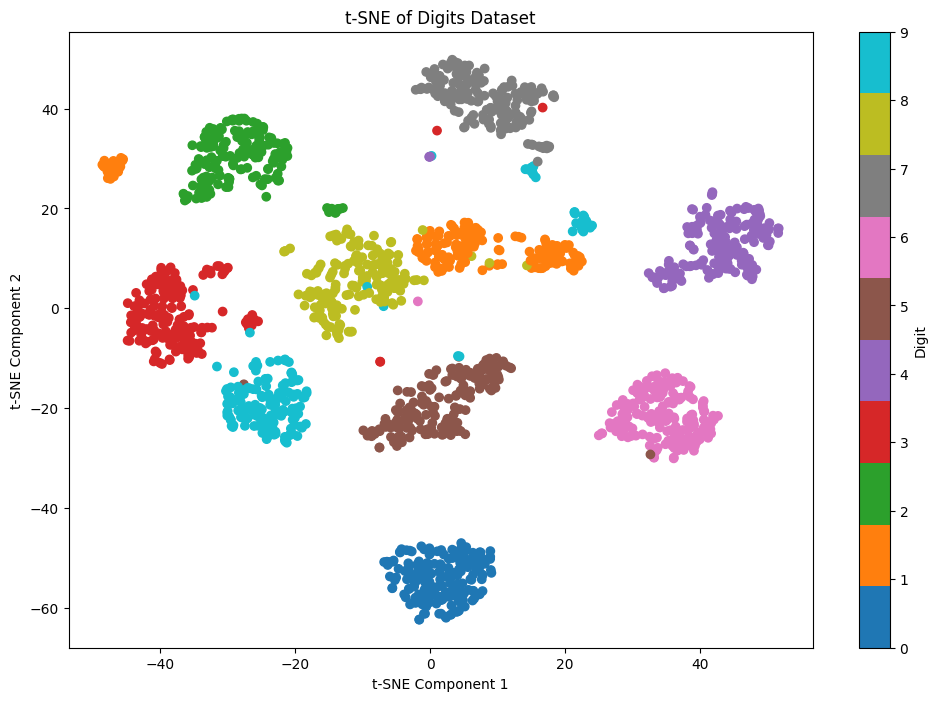

In [5]:
# Perform t-SNE analysis on the digits dataset
reduced_data_tsne = compute_dimensionality_reduction(digits_data, model="tsne", n_components=2)

print("Reduced data shape:", reduced_data_tsne.shape)

# Plot the reduced data
plt.figure(figsize=(12, 8))
scatter = plt.scatter(reduced_data_tsne[:, 0], 
                      reduced_data_tsne[:, 1], 
                      c=digits_target, 
                      cmap='tab10')
plt.title("t-SNE of Digits Dataset")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.colorbar(scatter, label="Digit")
plt.show()

## Using and visualizing UMAP
UMAP is another non-linear technique that often provides a good balance between preserving local and global structures in the data.

Reduced data shape: torch.Size([1797, 2])


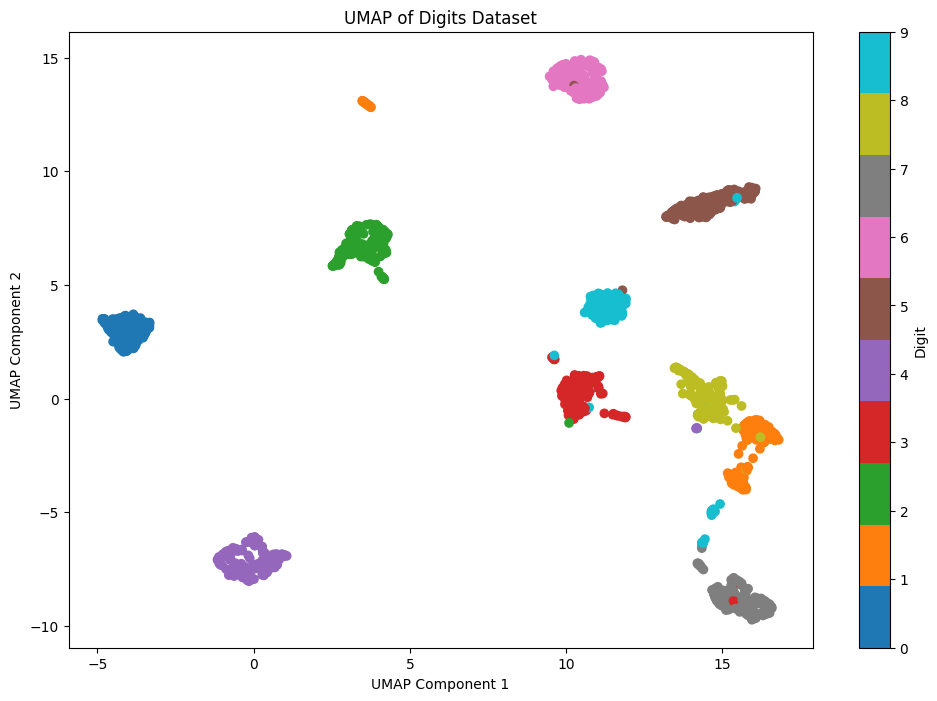

In [6]:
# Perform UMAP analysis on the digits dataset
reduced_data_umap = compute_dimensionality_reduction(digits_data, model="umap", n_components=2)

print("Reduced data shape:", reduced_data_umap.shape)

# Plot the reduced data
plt.figure(figsize=(12, 8))
scatter = plt.scatter(reduced_data_umap[:, 0], 
                      reduced_data_umap[:, 1], 
                      c=digits_target, 
                      cmap='tab10')
plt.title("UMAP of Digits Dataset")
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.colorbar(scatter, label="Digit")
plt.show()

## Using custom parameters
Senselab makes it easy to use custom parameters for each of these models. To do so, add the required parameters in the `compute_dimensionality_reduction` function. Make sure to use the parameters as specified in the `scikit-learn` or `umap-learn` packages, linked below.

As an example, the performance of t-SNE can be sensitive to its parameters, particularly the perplexity. The following code provides an example of using a custom perplexity with t-SNE in senselab.

Reduced data shape: torch.Size([1797, 2])


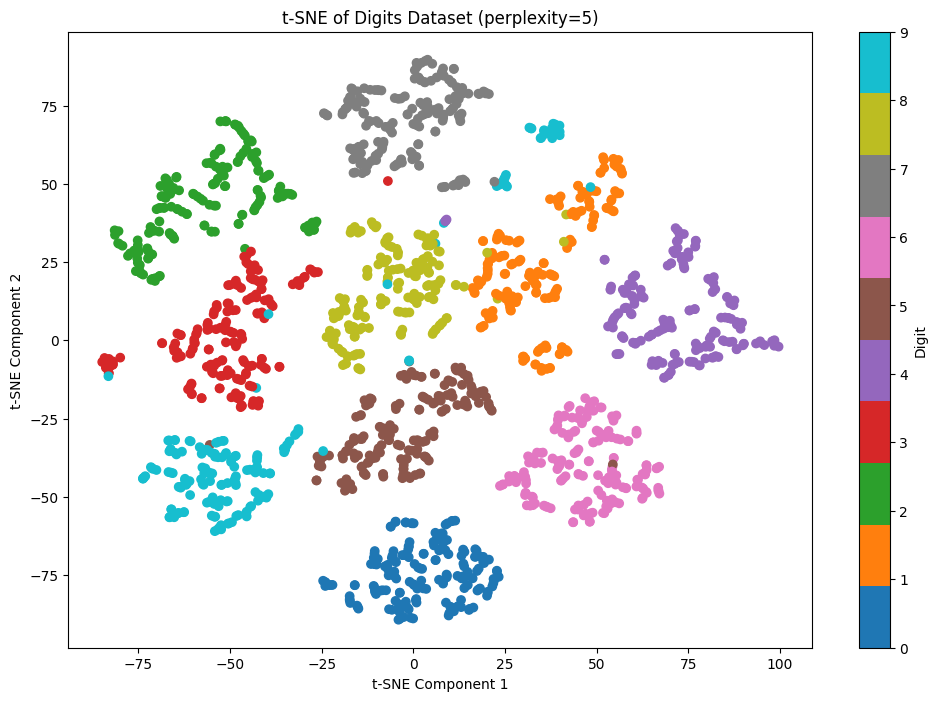

In [7]:
reduced_data_tsne_custom_params = compute_dimensionality_reduction(digits_data, 
                                                                   model="tsne", 
                                                                   n_components=2, 
                                                                   perplexity=5)

print("Reduced data shape:", reduced_data_tsne_custom_params.shape)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(reduced_data_tsne_custom_params[:, 0], 
                      reduced_data_tsne_custom_params[:, 1], 
                      c=digits_target, 
                      cmap='tab10')
plt.title("t-SNE of Digits Dataset (perplexity=5)")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.colorbar(scatter, label="Digit")
plt.show()

## Implementation Details and Further Reading

Senselab uses implementations from scikit-learn for PCA and t-SNE, and the umap-learn library for UMAP. For detailed information about each method and its parameters, please refer to the following documentation:

- PCA: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
- t-SNE: https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
- UMAP: https://umap-learn.readthedocs.io/en/latest/api.html